In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import random 

In [2]:
def label_to_output(label):
    o = [0]*10
    o[label] = 1
    return o

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255, x_test/255

TRAIN_LENGTH = len(x_train) # 60000
TEST_LENGTH = len(x_test) # 10000

train_labels = np.zeros((TRAIN_LENGTH, 10))
for i, label in enumerate(y_train):
    train_labels[i] = (label_to_output(label))

test_labels = np.zeros((TEST_LENGTH, 10))
for i, label in enumerate(y_test):
    test_labels[i] = (label_to_output(label))


In [8]:
output_w = np.load('perceptron_layer_weights/single_layer_weight.npy')
output_b = np.load('perceptron_layer_weights/single_layer_bias.npy')

In [11]:
x = x_test
label = test_labels 
m = x.shape[0]

input_layer = x.reshape(-1, 784, 1)

z1 = np.matmul(output_w, input_layer) + output_b
y  = sigmoid(z1)

predictions = np.argmax(y, axis = 1)
equals = predictions == y_test.reshape(m, 1)

accuracy = np.average(equals)



0.9173


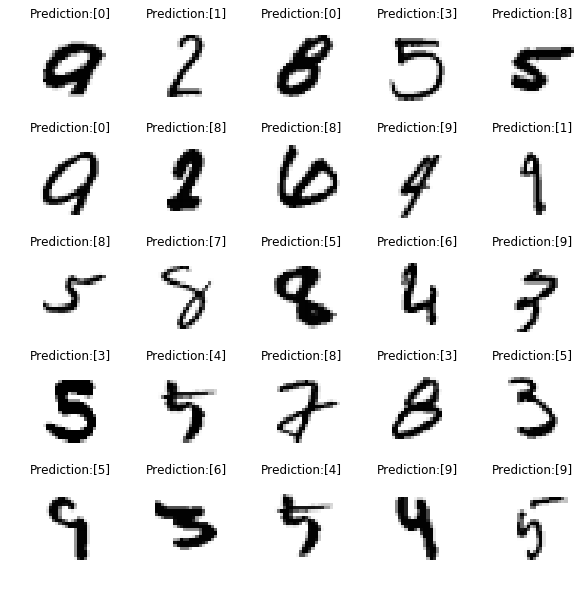

In [16]:
false_index = []

for i, label in enumerate(y_test):
    if label != predictions[i]:
        false_index.append(i)

fig, axs = plt.subplots(5, 5)
plt.subplots_adjust(hspace=0.3)
fig.set_size_inches(10,10)

for i, ax in enumerate(axs.flat):
    shift = np.random.randint(0, len(false_index) - 25)
    index = false_index[i + shift]
    ax.imshow(x_test[index], cmap = 'Greys')
    ax.set_title('Prediction:{}'.format(str((predictions[index]))))
    ax.axis('off')

plt.savefig('images/single_layer_false.png', dpi = 100)